In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
from datetime import datetime, timedelta

In [2]:
df = pd.read_csv('trades.csv')
# Fix the time column
df['time'] = pd.to_datetime(df['time'])

# Remove column trade_id
df = df.drop(columns=['trade_id'])

# Group by side, price, time and sum the size
df = df.groupby(['side', 'price', 'time'])['size'].sum().reset_index()

# Add a column called day
df['day'] = pd.to_datetime(df['time']).dt.date

df.head()

,side,price,time,size,day
0,buy,1.0001,2025-09-25 03:32:12.178759+00:00,138.02,2025-09-25
1,buy,1.0001,2025-09-25 03:44:12.441170+00:00,5000.00,2025-09-25
2,buy,1.0001,2025-09-25 04:21:34.172087+00:00,899.78,2025-09-25
3,buy,1.0001,2025-09-25 04:32:15.432034+00:00,45.17,2025-09-25
4,buy,1.0001,2025-09-25 04:51:16.585584+00:00,897.72,2025-09-25


In [3]:
# Sort df by time
df = df.sort_values('time')

df.head(50)

,side,price,time,size,day
19456,sell,1.0004,2025-09-24 00:48:34.835177+00:00,422.98,2025-09-24
19457,sell,1.0004,2025-09-24 00:48:46.689000+00:00,422.98,2025-09-24
19458,sell,1.0004,2025-09-24 00:50:15.993753+00:00,292244.23,2025-09-24
486,buy,1.0003,2025-09-24 00:57:00.353522+00:00,605.40,2025-09-24
19459,sell,1.0004,2025-09-24 00:57:18.410859+00:00,689.03,2025-09-24
2065,buy,1.0004,2025-09-24 00:57:42.978165+00:00,605.40,2025-09-24
22524,sell,1.0005,2025-09-24 00:59:14.484352+00:00,689.03,2025-09-24
22525,sell,1.0005,2025-09-24 00:59:21.190281+00:00,689.03,2025-09-24
2066,buy,1.0004,2025-09-24 01:10:05.009753+00:00,45.00,2025-09-24
2067,buy,1.0004,2025-09-24 01:10:05.021236+00:00,45.00,2025-09-24


In [4]:
# Group by price and sum the size
df_price_sum = df.groupby('price')['size'].sum()
# Fix the index
df_price_sum = df_price_sum.reset_index()

# Plot the price vs the sum of the size
px.bar(df_price_sum, x='price', y='size')


In [5]:
# Group by price and sum the size
df_price_sum = df.groupby('price')['size'].count()
# Fix the index
df_price_sum = df_price_sum.reset_index()

# Plot the price vs the sum of the size
px.bar(df_price_sum, x='price', y='size')


In [6]:
# Convert time to datetime
df['time'] = pd.to_datetime(df['time'])

# Sort by time to ensure correct time difference calculation
df = df.sort_values('time')

# Group by day and price
groups = df.groupby(['day', 'price'])

# Calculate time differences for each group
time_diffs_by_group = {}
for (day, price), group in groups:
    # Calculate time differences in seconds
    time_diffs = group['time'].diff().dt.total_seconds()
    # Remove NaN (first entry in each group)
    time_diffs = time_diffs.dropna()
    if len(time_diffs) > 0:  # Only store if we have time differences
        time_diffs_by_group[(day, price)] = time_diffs

# Count number of unique days and prices for subplot layout
unique_days = df['day'].nunique()
unique_prices = df['price'].nunique()

# Create subplots - one row per day, one column per unique price
# First, get unique days and prices sorted
unique_days = sorted(df['day'].unique())
unique_prices = sorted(df['price'].unique())


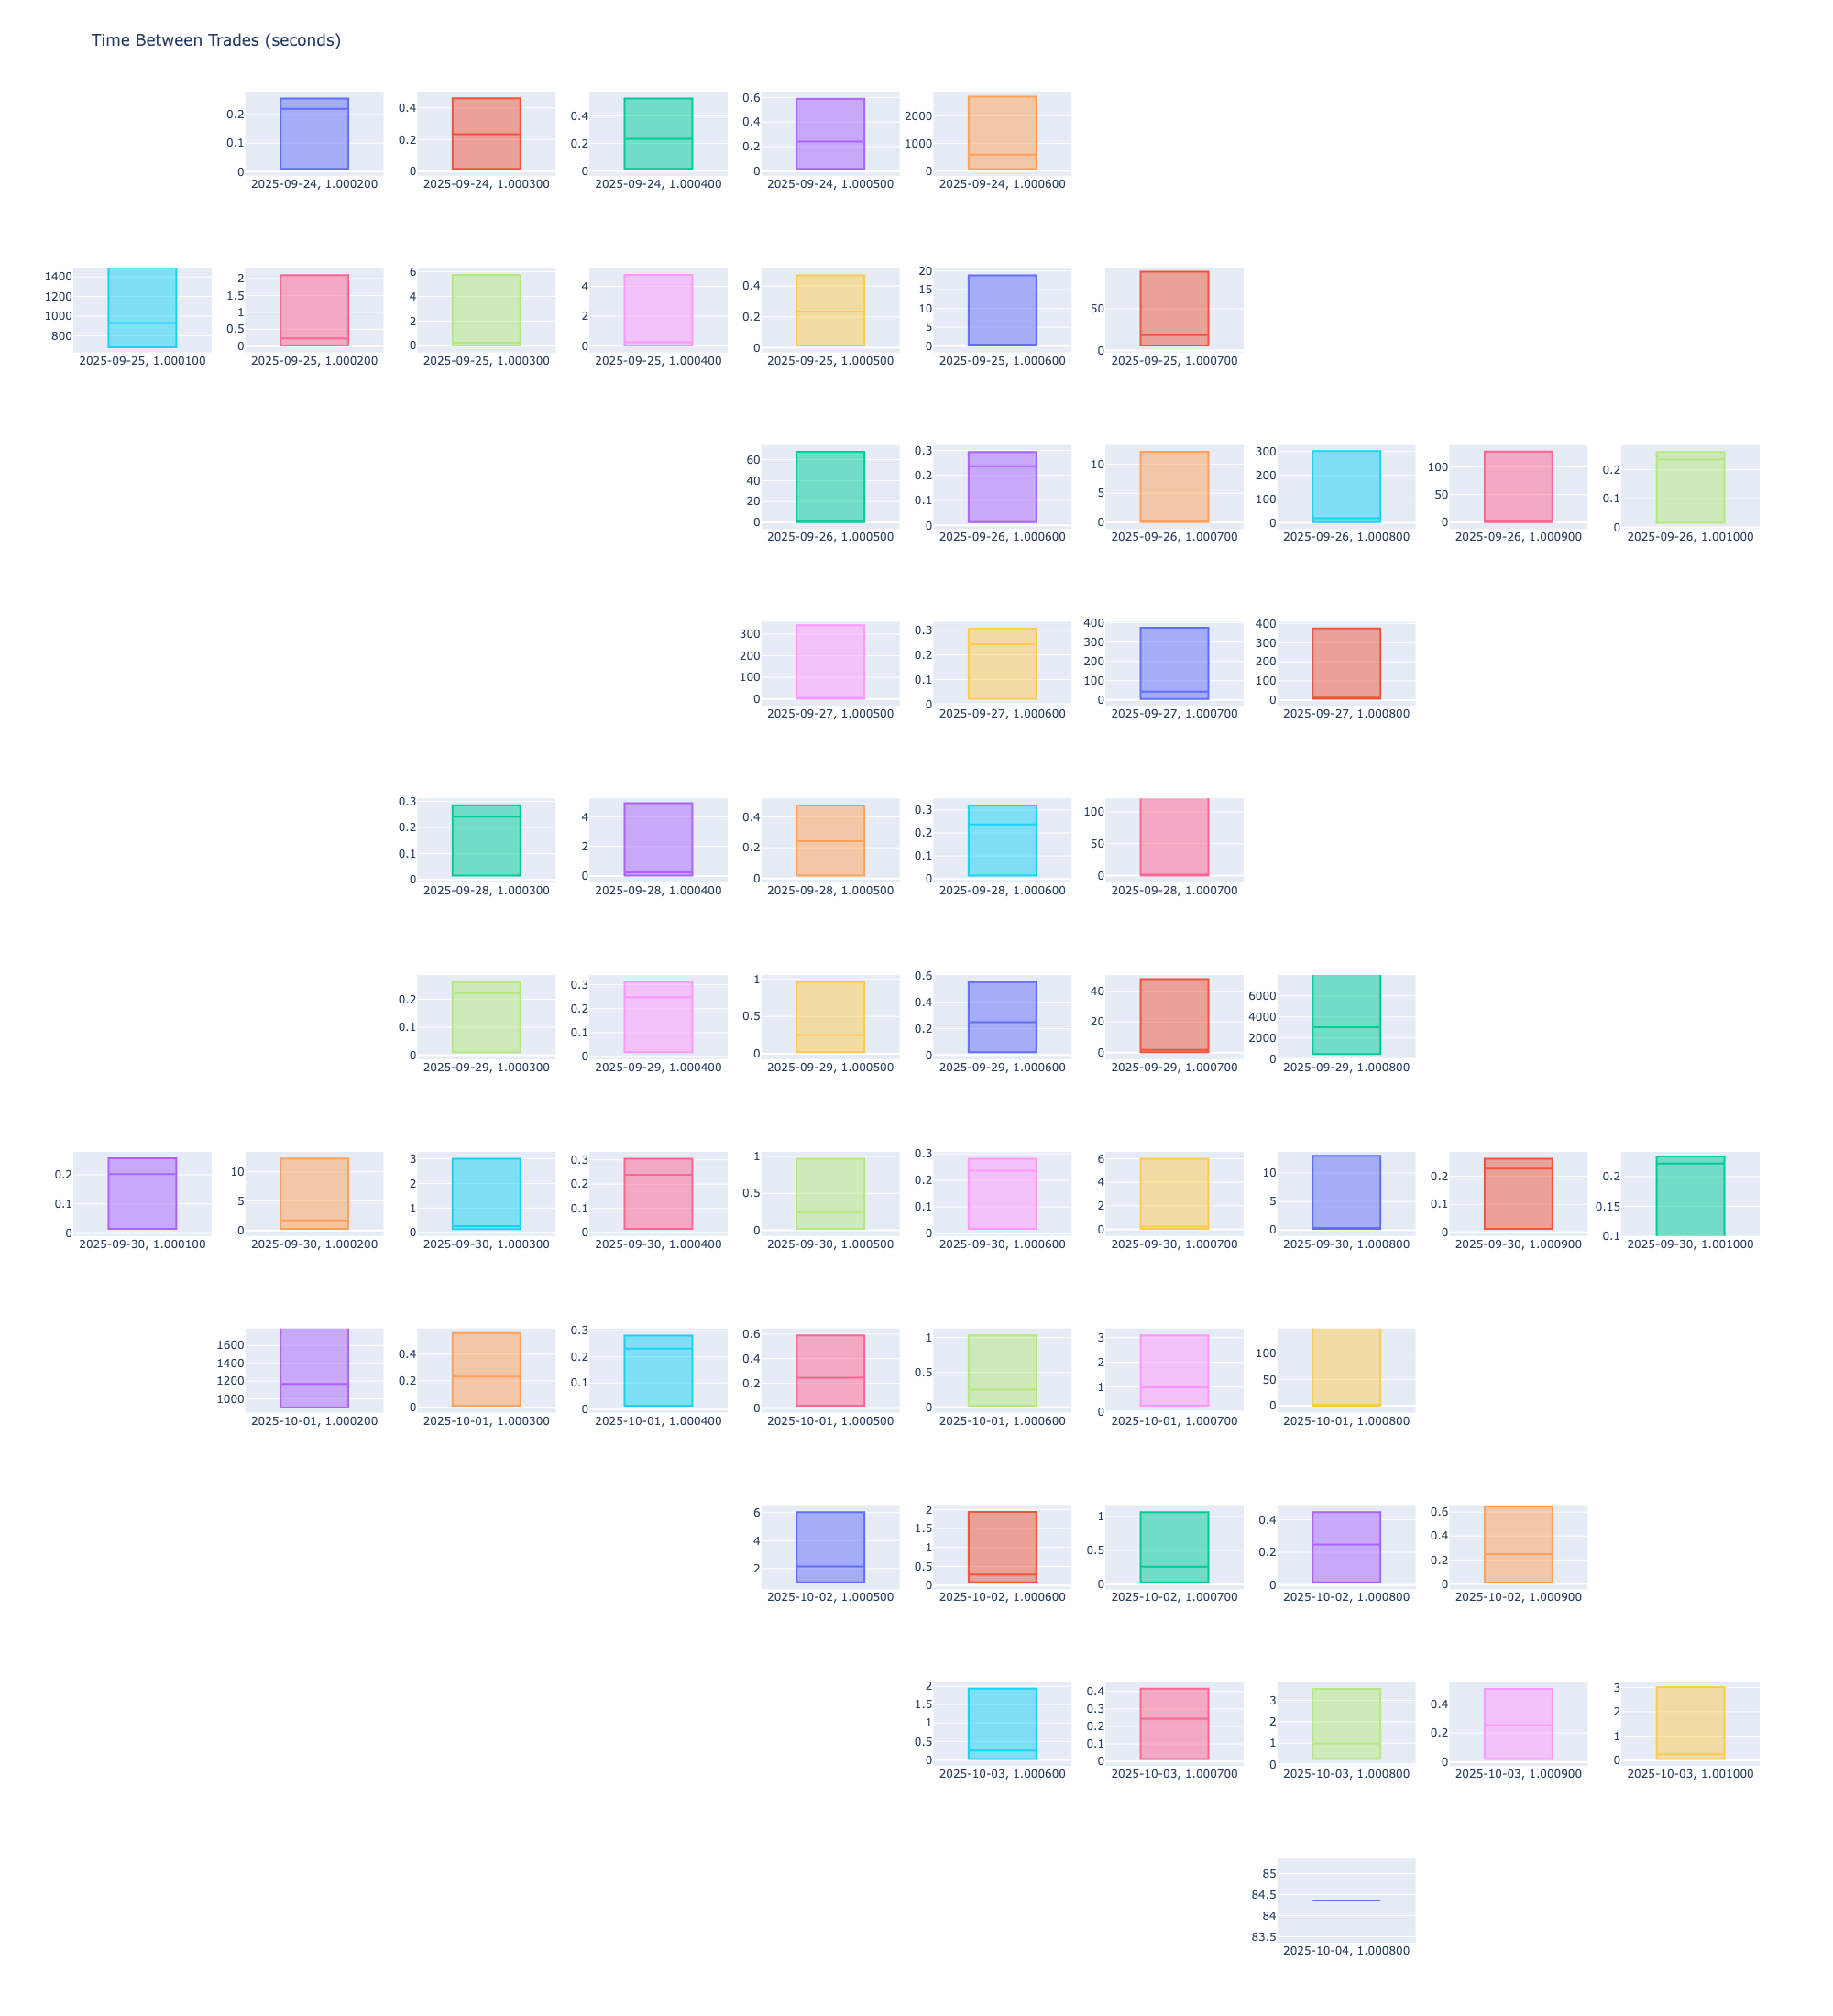

In [ ]:
# Create subplot grid
fig = make_subplots(
    rows=len(unique_days),
    cols=len(unique_prices),
    vertical_spacing=0.05
)

# Add box plots for each day-price combination
for i, day in enumerate(unique_days, 1):
    for j, price in enumerate(unique_prices, 1):
        if (day, price) in time_diffs_by_group:
            time_diffs = time_diffs_by_group[(day, price)]
            
            # Calculate Q1 and Q3 for y-axis limits
            Q1 = np.percentile(time_diffs, 25)
            Q3 = np.percentile(time_diffs, 75)
            IQR = Q3 - Q1
            
            # Add some padding (10%) to the range for better visualization
            padding = IQR * 0.1
            ymin = Q1 - padding
            ymax = Q3 + padding
            
            # Create box plot for time differences
            fig.add_trace(
                go.Box(
                    y=time_diffs,
                    name=f'{day}, {price:.6f}',
                    showlegend=False,
                    boxpoints=False,  # This removes outliers from the plot
                    showwhiskers=False  # This removes the whiskers showing min/max values
                ),
                row=i,
                col=j
            )
            
            # Update y-axis range for this subplot
            fig.update_yaxes(range=[ymin, ymax], row=i, col=j)

# Update layout
fig.update_layout(
    height=200 * len(unique_days),
    width=200 * len(unique_prices),
    showlegend=False,
    title_text='Time Between Trades (seconds)'
)

fig.show(renderer="png")
# fig.show()  # For interactive plot
